# Demonstration using Python tools freely available online
![](banner-undip.jpg)

## Requirements
### Python tools
- Python
- plotly
- sklearn

In [28]:
!python3 --version
!pip freeze |(grep 'plotly\|numpy\|scikit-learn')
#import pkg_resources
#pkg_resources.get_distribution("plotly").version

Python 3.8.3
numpy==1.19.4
plotly==4.13.0
scikit-learn==0.23.2


# TDA tools 
- scikit ripser
- gudhi
- giotto

In [2]:
!pip freeze |(grep 'gudhi\|giotto\|ripser')

giotto-tda==0.3.1
gudhi==3.3.0
ripser==0.6.0


# Scikit-TDA: TDALabs [ Chris Tralie (Ursinus College)](https://github.com/ctralie/TDALabs)

<img src="scikit-tda.png" alt="drawing" width="100"/> 
**Libraries**
- Ripser.py
- Kepler Mapper
- Persim
- ChechMate
- TADASET

In [6]:
! pip show scikit-tda

Name: scikit-tda
Version: 0.0.3
Summary: Topological Data Analysis for humans
Home-page: https://github.com/scikit-tda/scikit-tda
Author: Nathaniel Saul
Author-email: nathaniel.saul@wsu.edu
License: MIT
Location: /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages
Requires: Cython, numpy, numba, pillow, scikit-learn, scipy, tadasets, persim, matplotlib, ripser, kmapper, umap-learn
Required-by: 


In [7]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from persim import plot_diagrams
import time

## Circle

<IPython.core.display.Javascript object>


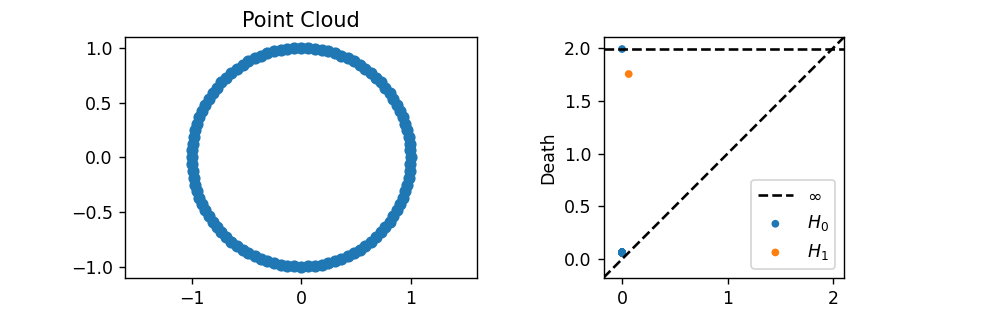

In [8]:
# Create 100 points on the unit circle
N = 100
t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N, 2))
X[:, 0] = np.cos(t)
X[:, 1] = np.sin(t)


# Compute the persistence diagram of this point cloud
dgms = ripser(X)['dgms']

plt.figure(figsize=(8, 2.5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title("Point Cloud")
plt.subplot(122)
plot_diagrams(dgms)
plt.show()


## Sphere

Elapsed Time:  1.953956127166748


<IPython.core.display.Javascript object>


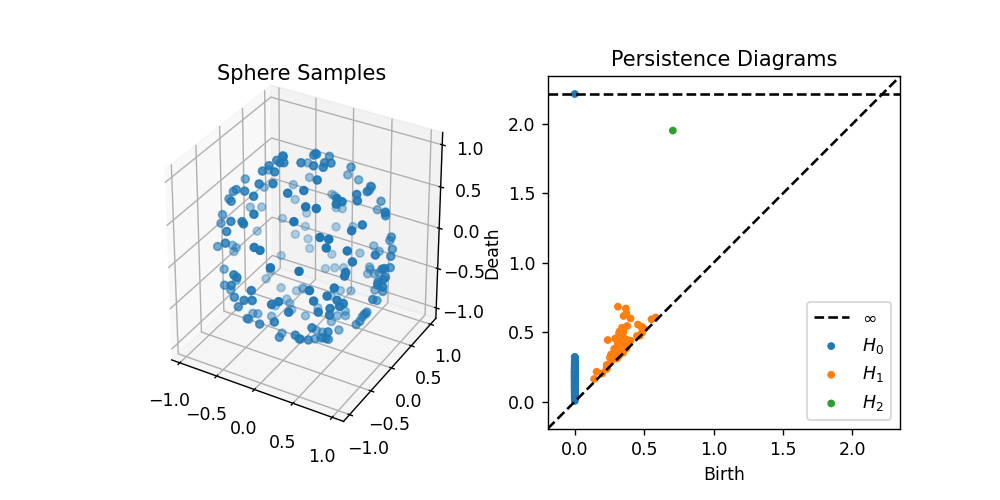

Text(0.5, 1.0, 'Persistence Diagrams')

In [9]:
# Step 1: Setup the point cloud
N = 200 #Number of points
X = np.random.randn(N, 3) #Draw from 3D Gaussian
X = X/np.sqrt(np.sum(X**2, 1))[:, None] #Normalize each point to unit length

# Step 2: Compute all pairwise arc lengths between sampled points
dotProds = X.dot(X.T) #Entry ij in this matrix holds the dot product between point i and j, or cos(theta)
#The dot products should be in [-1, 1], but may leave this range due to numerical roundoff
dotProds[dotProds < -1] = -1
dotProds[dotProds > 1] = 1
DSphere = np.arccos(dotProds) #The arc length is the inverse cosine of the dot products of unit vectors
np.fill_diagonal(DSphere, 0) #Be sure distance of points to themselves is zero

tic = time.time()
dgms = ripser(DSphere, distance_matrix=True, maxdim=2)['dgms']
print("Elapsed Time: ", time.time()-tic)
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.title("Sphere Samples")
plt.subplot(122)
plot_diagrams(dgms)
plt.title("Persistence Diagrams")

## Torus

<IPython.core.display.Javascript object>


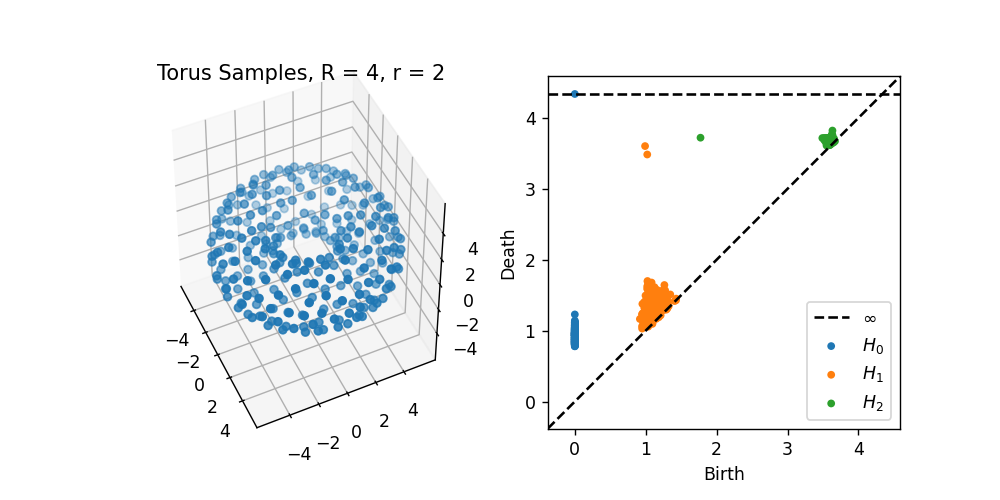

In [10]:
N = 10000 #Number of initial points in (theta, phi) space
n_perm = 300 #Number of points to evenly subsample in 3D
R = 4
r = 2
theta = np.random.rand(N)*2*np.pi
phi = np.random.rand(N)*2*np.pi
X = np.zeros((N, 3))
X[:, 0] = (R + r*np.cos(theta))*np.cos(phi)
X[:, 1] = (R + r*np.cos(theta))*np.sin(phi)
X[:, 2] = r*np.sin(theta)
xr = [np.min(X.flatten()), np.max(X.flatten())]

#Now compute persistence diagrams up to H2 on a furthest points subsample
res = ripser(X, maxdim=2, n_perm=n_perm)
dgms = res['dgms']
X = X[res['idx_perm'], :] # Take out subsampled points

plt.figure(figsize=(8, 4))
ax = plt.subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(xr)
ax.set_ylim(xr)
ax.set_zlim(xr)
plt.title("Torus Samples, R = %g, r = %g"%(R, r))
plt.subplot(122)
plot_diagrams(dgms)
plt.show()

## 3D Embedded Torus: we need $\mathbb{Z} / 3 \mathbb{Z}$ rather than $\mathbb{Z} / 2 \mathbb{Z}$ to identify correct Persistence Diagram

We will now sample points from a torus embedded in 3D and compute persistent homology up to H2.  Given a parameter $R$ whih is the radius of a circle through the center of the tube and a parameter $r$ which is the width of the tube, we use the following equation for the 3D coordinates of a point $(\theta, \phi)$, where $\theta$ is along the $r$ radius circle and $\phi$ is along the $R$ radius circle:
$x = (R + r \cos(\theta)) \cos (\phi)$
$y = (R + r \cos(\theta)) \sin (\phi)$
$z = r \sin (\theta)$

<IPython.core.display.Javascript object>


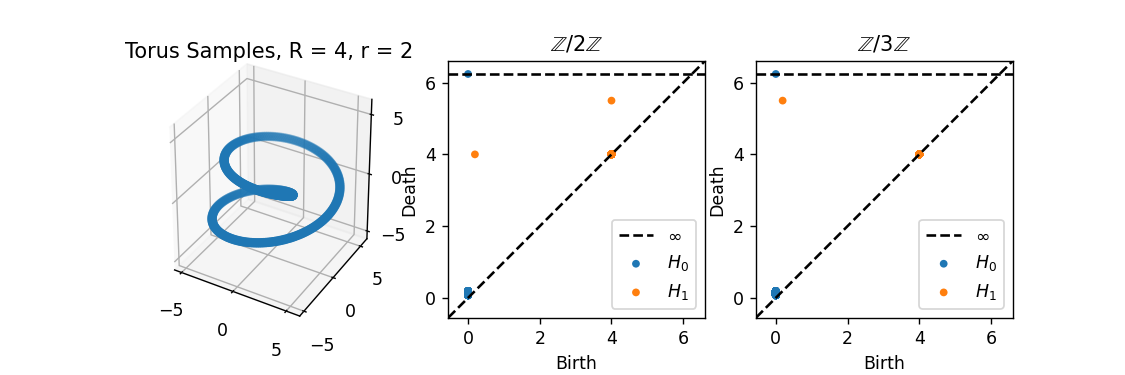

In [11]:
NPoints = 400
R = 4
r = 2
theta = np.linspace(0, 2*np.pi, NPoints+1)[0:NPoints]
phi = theta*2
X = np.zeros((NPoints, 3))
X[:, 0] = (R + r*np.cos(theta))*np.cos(phi)
X[:, 1] = (R + r*np.cos(theta))*np.sin(phi)
X[:, 2] = r*np.sin(theta)
xr = [np.min(X.flatten()), np.max(X.flatten())]

#Now compute persistence diagrams with Z/2 coefficients
dgms2 = ripser(X, maxdim=1, coeff=2)['dgms']
dgms3 = ripser(X, maxdim=1, coeff=3)['dgms']

plt.figure(figsize=(9, 3))
ax = plt.subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(xr)
ax.set_ylim(xr)
ax.set_zlim(xr)
plt.title("Torus Samples, R = %g, r = %g"%(R, r))
plt.subplot(132)
plot_diagrams(dgms2)
plt.title("$\mathbb{Z} / 2 \mathbb{Z}$")
plt.subplot(133)
plot_diagrams(dgms3)
plt.title("$\mathbb{Z} / 3 \mathbb{Z}$")
plt.show()

## Differences between two point clouds
### Wasserstein And Bottleneck

In [12]:
import ripser
import numpy as np
import persim
import tadasets
#from ripser import ripser
from persim import plot_diagrams
from persim import PersImage
from itertools import product
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


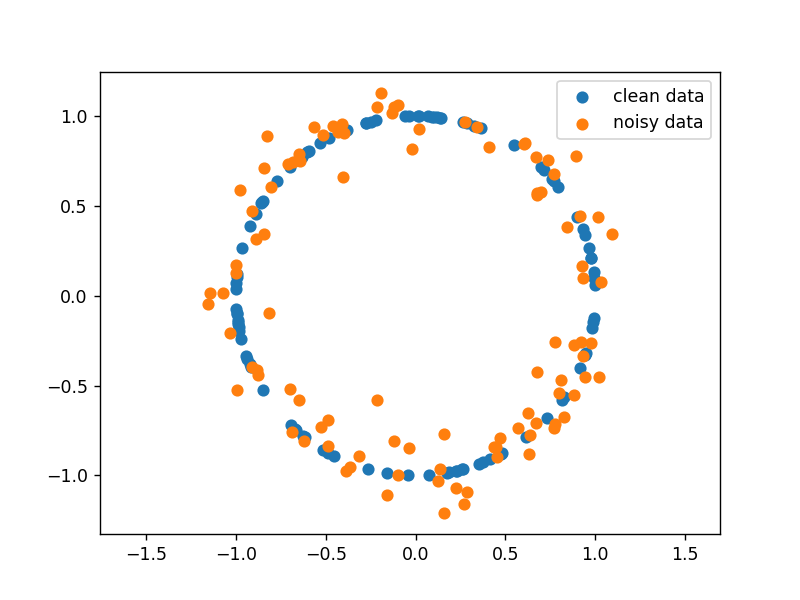

In [15]:
data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
data_noisy = tadasets.dsphere(d=1, n=100, noise=0.1)

plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data")
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data")
plt.axis('equal')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


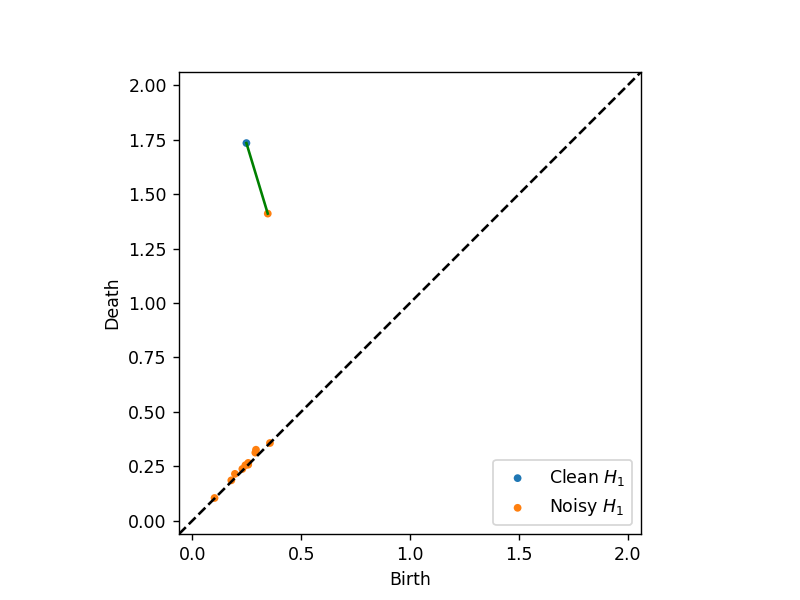

In [16]:
dgm_clean = ripser.ripser(data_clean)['dgms'][1]
dgm_noisy = ripser.ripser(data_noisy)['dgms'][1]
#plot_diagrams([dgm_clean, dgm_noisy] , labels=['Clean $H_1$', 'Noisy $H_1$'])

distance_bottleneck, (matching, D) = persim.bottleneck(dgm_clean, dgm_noisy, matching=True)
persim.bottleneck_matching(dgm_clean, dgm_noisy, matching, D, labels=['Clean $H_1$', 'Noisy $H_1$'])

![](gudhi.png)
# [Gudhi:](https://gudhi.inria.fr/)
# GUDHI is a five years project (2014-2019) supported by an Advanced Investigator Grant of the European Research Council and hosted by INRIA
# TDA-Tutorial [ Vincent Rouvreau (Inria Saclay)](https://github.com/GUDHI/TDA-tutorial)

In [1]:
! pip show gudhi

Name: gudhi
Version: 3.3.0
Summary: The Gudhi library is an open source library for Computational Topology and Topological Data Analysis (TDA).
Home-page: https://gudhi.inria.fr/
Author: GUDHI Editorial Board
Author-email: gudhi-contact@lists.gforge.inria.fr
License: UNKNOWN
Location: /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages
Requires: numpy
Required-by: 


## Given point cloud

<IPython.core.display.Javascript object>


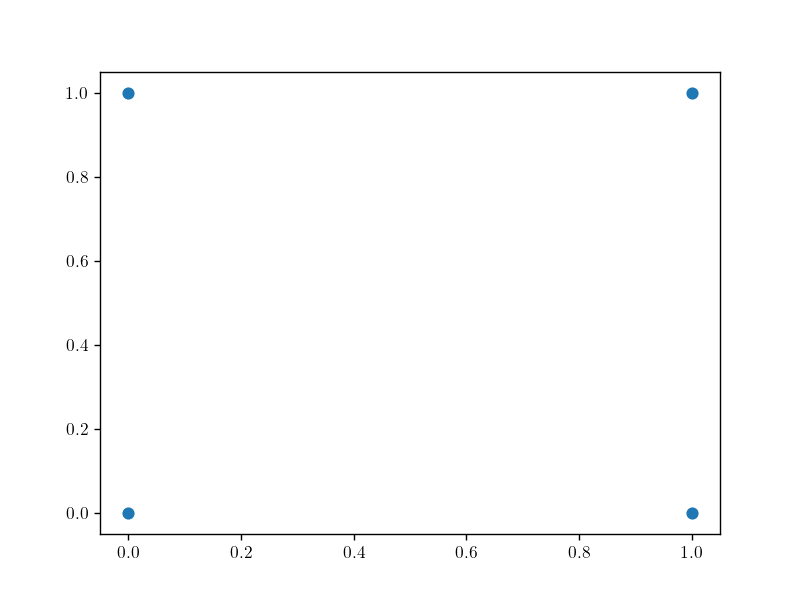

In [55]:
import matplotlib.pyplot as plt
points=[[0, 0], [1, 0], [0, 1], [1, 1]]
plt.scatter([0,1,0,1], [0,0,1,1])

diag= [(1, (1.0, 1.4142135623730951)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


<IPython.core.display.Javascript object>


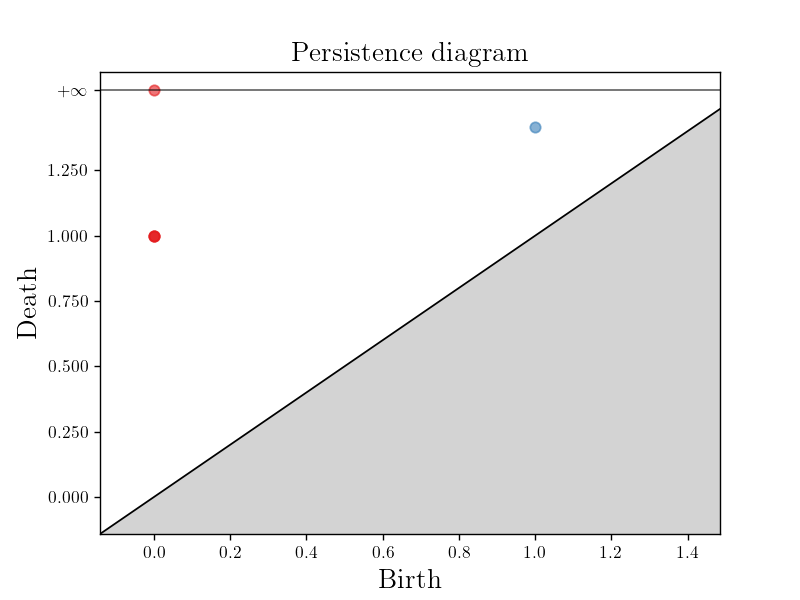

In [60]:
rips = gudhi.RipsComplex(points, max_edge_length=2)
simplex_tree = rips.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
print("diag=", diag)

gudhi.plot_persistence_diagram(diag)
plot.show()

## From Filtered persistence

<IPython.core.display.Javascript object>


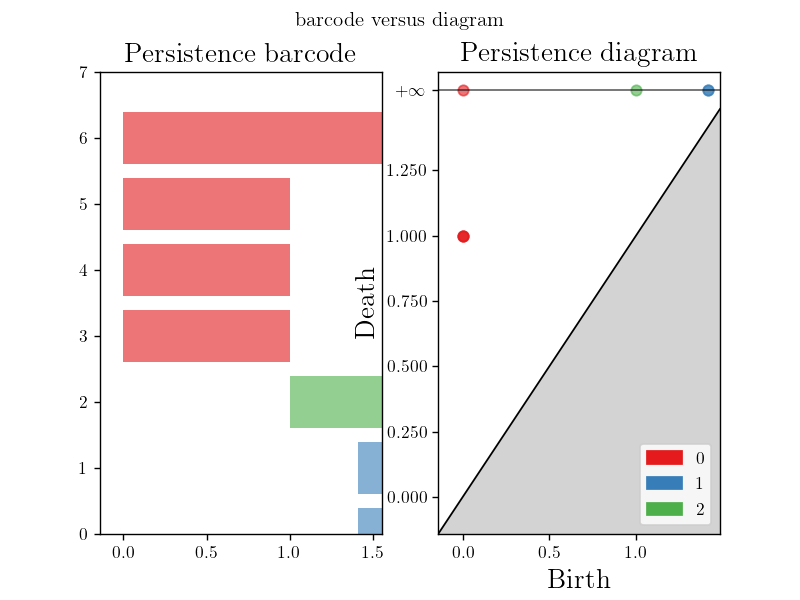

In [28]:
import matplotlib.pyplot as plot
import gudhi

persistence = [
    (2, (1.0, float("inf"))),
    (1, (1.4142135623730951, float("inf"))),
    (1, (1.4142135623730951, float("inf"))),
    (0, (0.0, float("inf"))),
    (0, (0.0, 1.0)),
    (0, (0.0, 1.0)),
    (0, (0.0, 1.0)),
]
fig, axes = plot.subplots(nrows=1, ncols=2)
gudhi.plot_persistence_barcode(persistence, axes = axes[0])
gudhi.plot_persistence_diagram(persistence, legend=True, axes = axes[1])
fig.suptitle("barcode versus diagram")
plot.show()


<IPython.core.display.Javascript object>


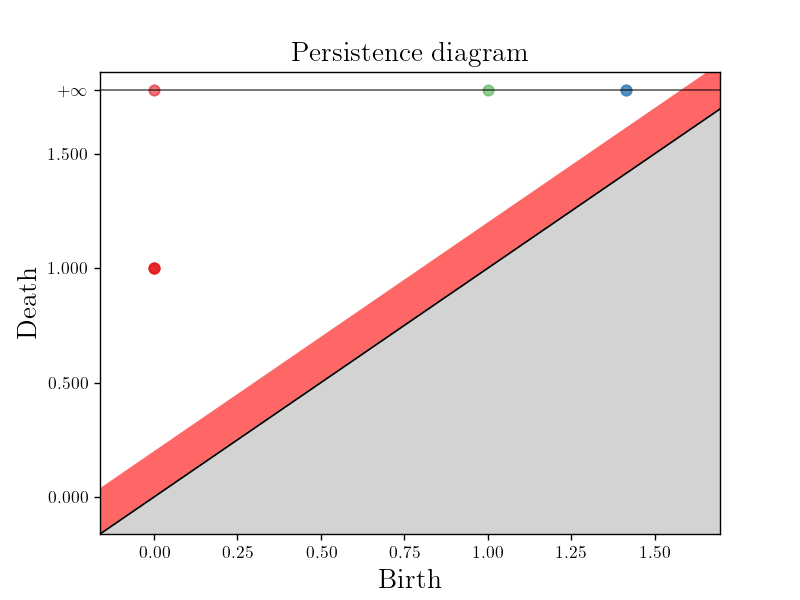

In [19]:
gudhi.plot_persistence_diagram(persistence, band=0.2)
plot.show()

## Infinity Sign

<IPython.core.display.Javascript object>


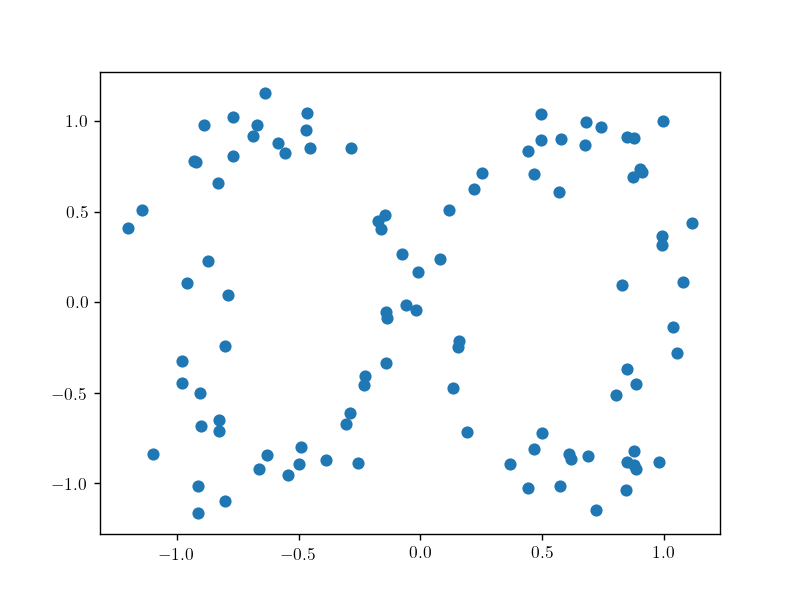

In [30]:
import tadasets
X = tadasets.infty_sign(n=100, noise=0.1)
plot.scatter(X[:, 0], X[:, 1])

In [43]:
type(X)

numpy.ndarray

<IPython.core.display.Javascript object>


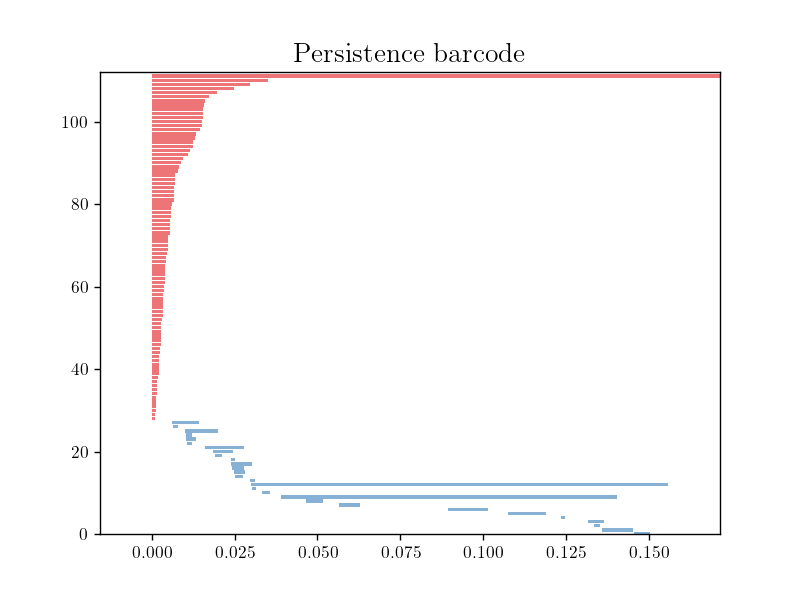

In [32]:
alpha_complex =  gudhi.AlphaComplex(points=X)
simplex_tree = alpha_complex.create_simplex_tree(max_alpha_square=5.0)
diag = simplex_tree.persistence(min_persistence=0.001)
fig = gudhi.plot_persistence_barcode(diag)
plot.show()

<IPython.core.display.Javascript object>


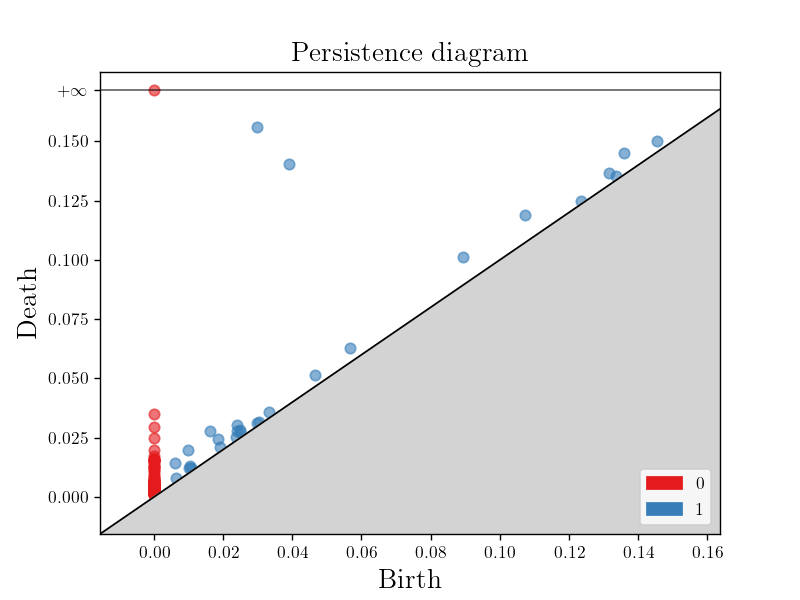

In [33]:
gudhi.plot_persistence_diagram(diag,legend=True)
plot.show()

## From a file in OFF format

In [66]:
import gudhi
import matplotlib.pyplot as plot
import gudhi.representations
import numpy as np

In [69]:
alpha_complex = gudhi.AlphaComplex(off_file='pts17.off')
simplex_tree = alpha_complex.create_simplex_tree(max_alpha_square=59.0)
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)


Alpha complex is of dimension 2 - 77 simplices - 17 vertices.


In [70]:
diag1 = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
print("betti_numbers()=",simplex_tree.betti_numbers())

betti_numbers()= [1, 0]


<IPython.core.display.Javascript object>


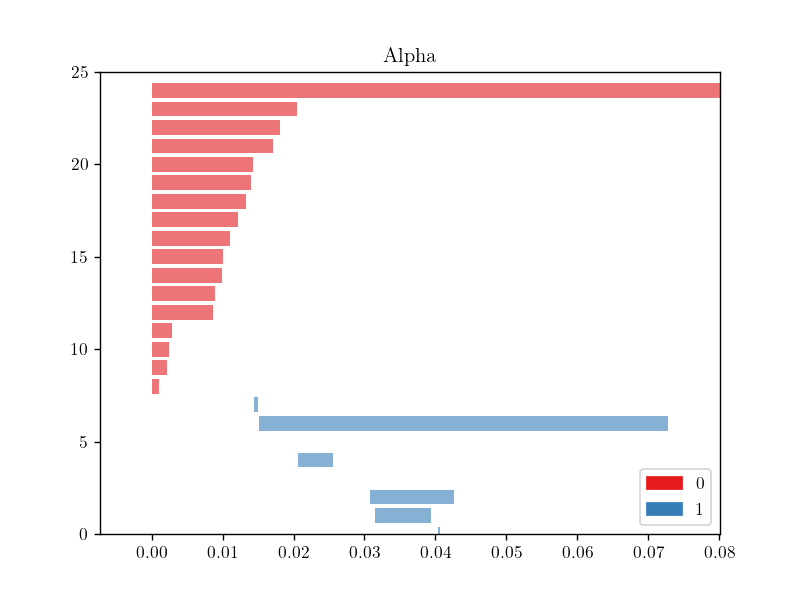

In [71]:
gudhi.plot_persistence_barcode(diag1,legend=True)
plot.title("Alpha")
plot.show()

<IPython.core.display.Javascript object>


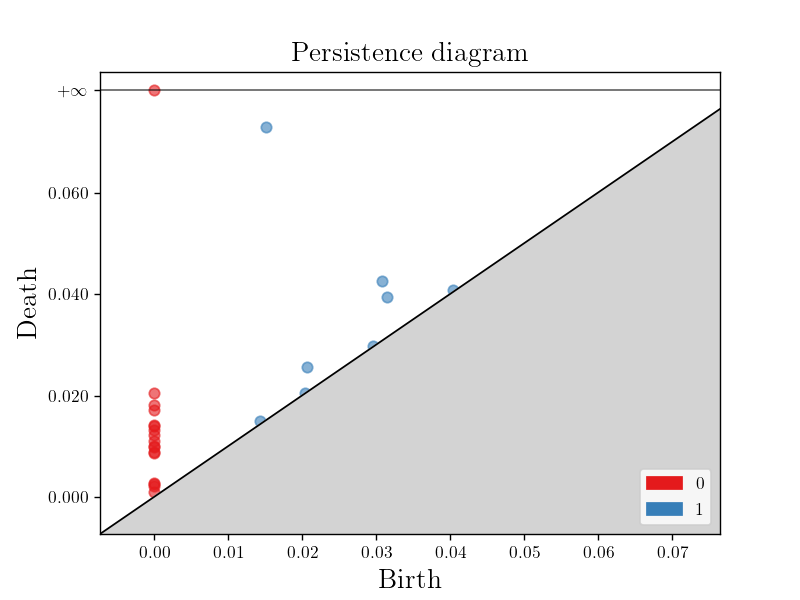

In [72]:
gudhi.plot_persistence_diagram(diag1,legend=True,band=0.0)
plot.show()

## Persistence Landscape

<IPython.core.display.Javascript object>


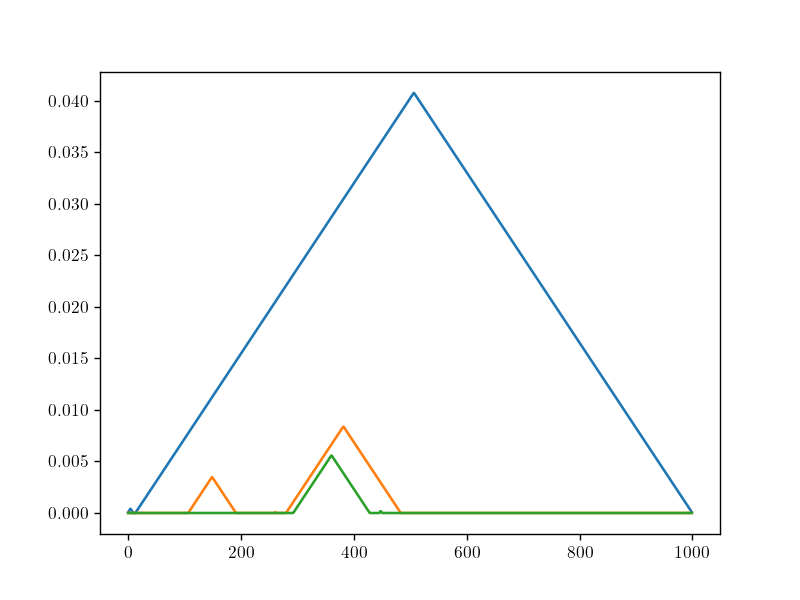

In [74]:
LS = gudhi.representations.Landscape(resolution=1000)
L = LS.fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])
plot.plot(L[0][:1000])
plot.plot(L[0][1000:2000])
plot.plot(L[0][2000:3000])
plot.show()

<IPython.core.display.Javascript object>


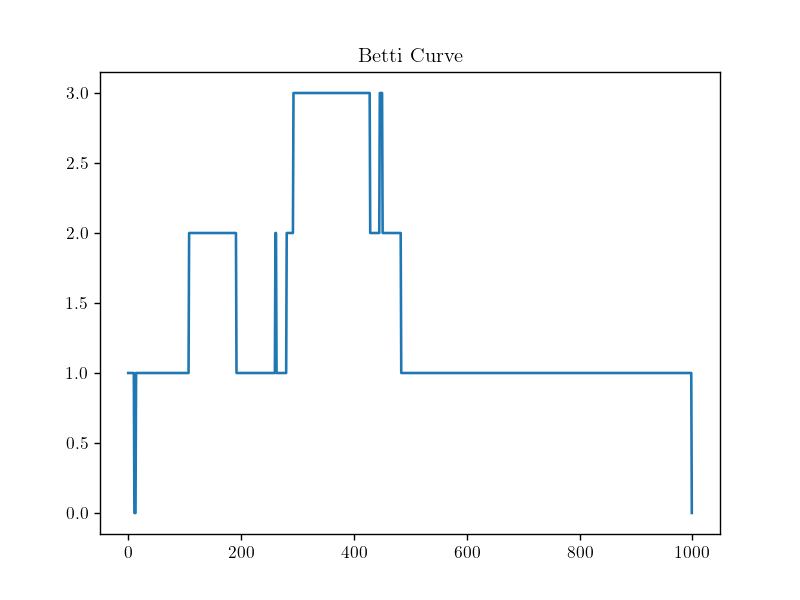

In [73]:
BC = gudhi.representations.BettiCurve(resolution=1000)
bc = BC.fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])
plot.plot(bc[0])
plot.title("Betti Curve")
plot.show()

<IPython.core.display.Javascript object>


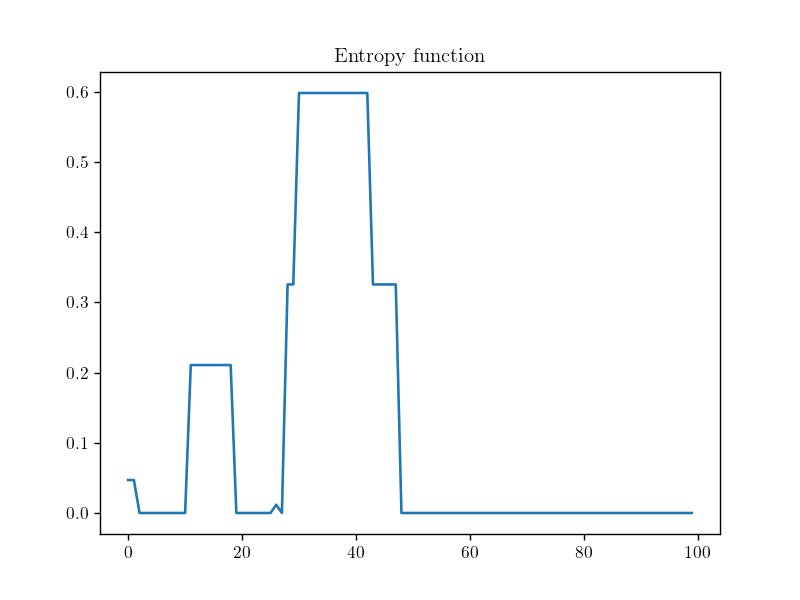

Text(0.5, 1.0, 'Entropy function')

In [78]:
ET = gudhi.representations.Entropy(mode="vector", normalized=False)
et = ET.fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])
plot.plot(et[0])
plot.title("Entropy function")

<IPython.core.display.Javascript object>


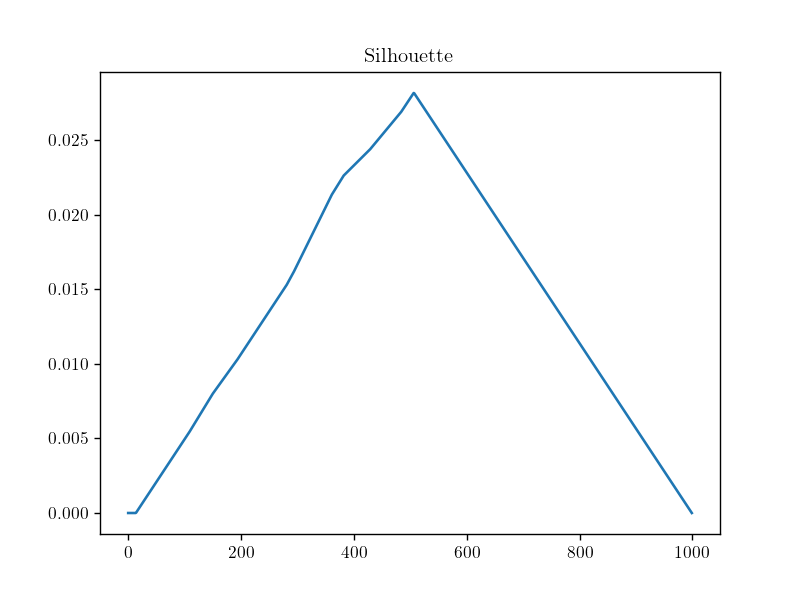

In [75]:

def pow(n):
  return lambda x: np.power(x[1]-x[0],n)

SH = gudhi.representations.Silhouette(resolution=1000, weight=pow(1))
sh = SH.fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])
plot.plot(sh[0])
plot.title("Silhouette")
plot.show()

<IPython.core.display.Javascript object>


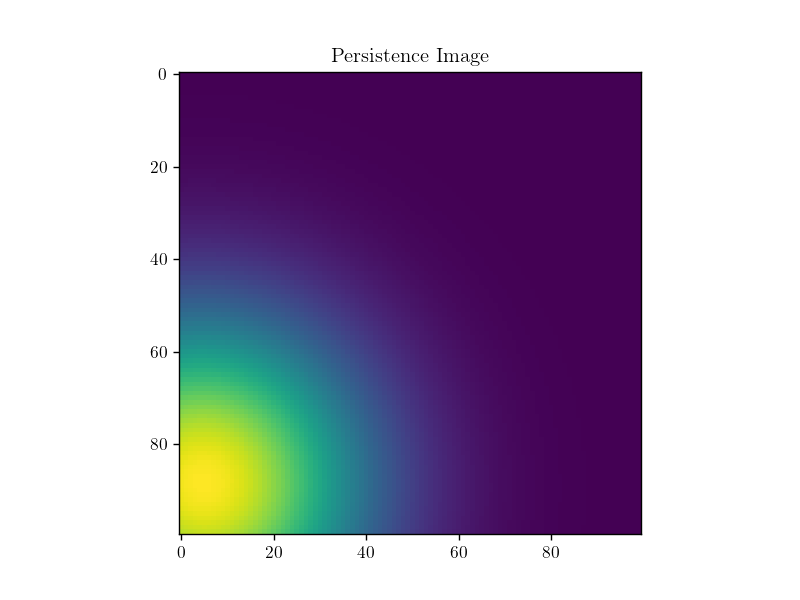

In [76]:
PI = gudhi.representations.PersistenceImage(bandwidth=.1, weight=lambda x: x[1], im_range=[0,0.4,0,0.4], resolution=[100,100])
pi = PI.fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])
plot.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plot.title("Persistence Image")
plot.show()

In [79]:
ET = gudhi.representations.Entropy(mode="scalar")
et = ET.fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])
print("Entropy statistic is " + str(et[0,:]))

CP = gudhi.representations.ComplexPolynomial(threshold=-1, polynomial_type="T")
cp = CP.fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])
print("Complex polynomial is " + str(cp[0,:]))

TV = gudhi.representations.TopologicalVector(threshold=-1)
tv = TV.fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])
print("Topological vector is " + str(tv[0,:]))

Entropy statistic is [0.89660583]
Complex polynomial is [-3.88787859e-02-4.43881257e-02j -1.00340120e-04+8.46085188e-04j
  3.80143230e-06-2.71628559e-06j -9.54430819e-09-2.00663660e-09j
  2.77113300e-12+4.60825406e-12j  2.78633670e-16-9.45820434e-16j
 -4.84010032e-20+2.38279907e-20j  4.14088016e-25+1.55495914e-25j]
Topological vector is [0.02884228 0.02884228 0.02884228 0.02884228 0.02884228 0.02884228
 0.02884228 0.00594453]


![](giotto.png)
## Giotto-TDA (Persistent Homology & Mapper)
 giotto-tda is a high performance topological machine learning toolbox in Python built on top of **scikit-learn** and is distributed under the GNU AGPLv3 license. It is part of the Giotto family of open-source projects.

In [18]:
! pip show giotto-tda

Name: giotto-tda
Version: 0.3.1
Summary: Toolbox for Machine Learning using Topological Data Analysis.
Home-page: https://github.com/giotto-ai/giotto-tda
Author: None
Author-email: None
License: GNU AGPLv3
Location: /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages
Requires: joblib, numpy, ipywidgets, plotly, scikit-learn, pyflagser, scipy, python-igraph
Required-by: 


In [1]:
import numpy as np
np.random.seed(seed=42)
from gtda.homology import VietorisRipsPersistence
from sklearn.datasets import make_circles

X = np.asarray([
    make_circles(100, factor=np.random.random())[0]
    for i in range(10)
])
#print(X)

## Hover on the points for information

In [2]:
from gtda.plotting import plot_point_cloud
i = 0
plot_point_cloud(X[i])

## Persistent Homology

In [3]:
VR = VietorisRipsPersistence()
Xt = VR.fit_transform(X)
VR.plot(Xt, sample=i)

In [21]:
! pip show scikit-learn

Name: scikit-learn
Version: 0.23.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages
Requires: threadpoolctl, scipy, numpy, joblib
Required-by: umap-learn, sklearn, scikit-tda, ripser, prince, persim, kmapper, hdbscan, giotto-tda


## Mapper: Sample codes from 
https://giotto-ai.github.io/gtda-docs/0.4.0/notebooks/mapper_quickstart.html

In [19]:
# Data wrangling
import numpy as np
import pandas as pd  # Not a requirement of giotto-tda, but is compatible with the gtda.mapper module

# Data viz
from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph
)

# ML tools
from sklearn import datasets
from sklearn.cluster import DBSCAN

In [20]:
data, _ = datasets.make_circles(n_samples=5000, noise=0.05, factor=0.3, random_state=42)

plot_point_cloud(data)

In [23]:
# Define filter function – can be any scikit-learn transformer
filter_func = Projection(columns=[0, 1])
# Define cover
cover = CubicalCover(n_intervals=10, overlap_frac=0.3)
# Choose clustering algorithm – default is DBSCAN
clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=True,
    n_jobs=n_jobs,
)

In [24]:
fig = plot_static_mapper_graph(pipe, data)
fig.show(config={'scrollZoom': True})

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.1s
